# Online Shoppers Intention

## Data Set Information:

This data set contains transactions occurring in an online store (E-commerce).  Out of the 12,330 customer samples in the dataset, 84.5% (10,422) were negative class samples (i.e. customers who did not end up buying the product), and the rest (1908) were positive class samples (i.e. customers who ended up buying). 


The dataset consists of <b>10 numerical</b> and <b>8 categorical</b> attributes. 

<b>Revenue:</b> 

The 'Revenue' attribute can be used as the class label.


<b>Administrative</b>, <b>Administrative Duration</b>, <b>Informational</b>, <b>Informational Duration</b>, <b>Product Related</b> and <b>Product Related Duration</b>: 

These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

<b>Bounce Rate</b>, <b>Exit Rate</b> and <b>Page Value:</b> 
 
 These features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

<b>Bounce Rate:</b> 

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

<b>Exit Rate:</b> 

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

<b>Page Value:</b> 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 


<b>Special Day:</b>

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes <b>operating system</b>, <b>browser</b>, <b>region</b>, <b>traffic type</b></b>, <b>visitor type</b> as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
 

##  Objective:

Build a machine learning model to predict whether a customer will buy a product or not.

#  1. Import Required Packages

In [1]:
#load required libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score 
from sklearn.metrics import plot_confusion_matrix



In [2]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [3]:
#import termcolor to create the colored lines
from termcolor import colored

# 2. Reading Data 

In [4]:
# Load Online Shoppers Intention Data 
df = pd.read_csv("/Users/shaya/Desktop/Arcadium-Project/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# 3. Exploratory Data Analysis (EDA)

In the first step, we explore some basic information of the dataset such as 
the dimensionality of dataset, a concise summary of a dataset and its descriptive statistics.  

## 3.1 Basic Information about the Dataset

In [5]:
# Get the dimensionality of DataSet
df.shape

(12330, 18)

In [6]:
# Get a concise summary of a Dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Get descriptive statistics 
df. describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## 3.2  Null Values in the dataset

The next step is to check if there exist null values in the dataset.

In [8]:
# Get the number of null values for each attribute
num_null = df.isnull().sum()

#print out the result of num_null_data 
print(colored("The number of null values in each column is", "blue", attrs=['bold'] ))
print("")
print(num_null)



# Get the total number of null values in the dataset
total_num_null = num_null.sum()

#print out the result of total_num_null 
print("")
print("")
print(colored("The total number of null values in dataset is ", "red", attrs=['bold']),  total_num_null)

The number of null values in each column is

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


The total number of null values in dataset is  0


<b>Observation 1</b>: 

1. There are 12,330 customer samples in the dataset. 

2. The dataset consists of the following 8 categorical attributes:
     
    Revenue (bool) <br>  Weekend (bool) <br> VisitorType (object) <br> 
    Month (object) <br>  OperatingSystems (int64)<br> Browser (int64)  <br> 
    Region (int64) <br> TrafficType (int64)


3. The dataset consists of the following 10 numerical attributes

    Administrative             
    Administrative_Duration    
    Informational              
    Informational_Duration     
    ProductRelated             
    ProductRelated_Duration    
    BounceRates                
    ExitRates                  
    PageValues                 
    SpecialDay                 


4. There are no null values in the dataset


## 3.3. Data Visualization 

### 3.3.1 Categorical Columns 

We start by analyzing the categorical attributes in the data set. Using appropriate visualization tools, we explore the distribution of categorical attributes and their relation with the class lable (Revenue).

### Revenue 

We learn more about the class lable 

In [9]:
# Get unique value in Revenue Column
df["Revenue"].unique()

array([False,  True])

In [10]:
# Count number of True and False 
df["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Text(0, 0.5, 'Count')

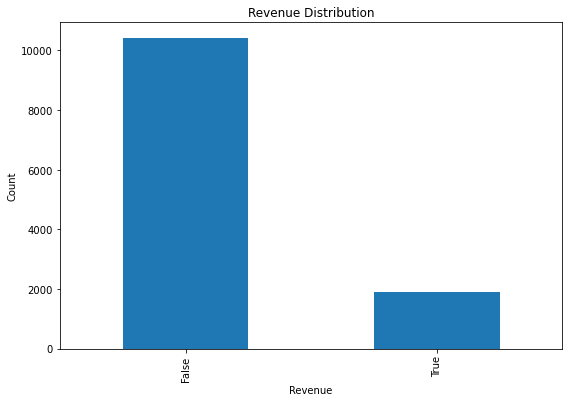

In [11]:
# Use bar chart to see the Revenue distribution 
fig, ax = plt.subplots(figsize=(9, 6))
df["Revenue"].value_counts().plot(kind = "bar", title = "Revenue Distribution", ax=ax)

#set lable for the chart
plt.xlabel("Revenue")
plt.ylabel("Count")

We now calculate the number/percentage of negative and positive class samples.

In [12]:
# total number of samples
n = len(df)

# number of negative class samples
num_neg_rev = df["Revenue"].value_counts()[0]

print(colored("The number of negative class samples is ", "red", attrs=['bold']),  num_neg_rev)

# number of positive class samples
num_pos_rev = df["Revenue"].value_counts()[1]

print(colored("The number of positive class samples is ", "blue", attrs=['bold']),  num_pos_rev)

print("")

# percentage of negative class samples
perc_neg_rev = num_neg_rev / n

print(colored("The percentage of negative class samples is ", "red", attrs=['bold']),  round(perc_neg_rev*100,1))


# percentage of positive class samples
perc_pos_rev =  num_pos_rev / n

print(colored("The percentage of positive class samples is ", "blue", attrs=['bold']),  round(perc_pos_rev*100,1))


The number of negative class samples is  10422
The number of positive class samples is  1908

The percentage of negative class samples is  84.5
The percentage of positive class samples is  15.5


###  Weekend

We study the second categorical attribute that has boolean datatype.

In [13]:
# Get unique value in weekend Column
df["Weekend"].unique()

array([False,  True])

In [14]:
#Count number of True and False  
df["Weekend"].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

Text(0, 0.5, 'Count')

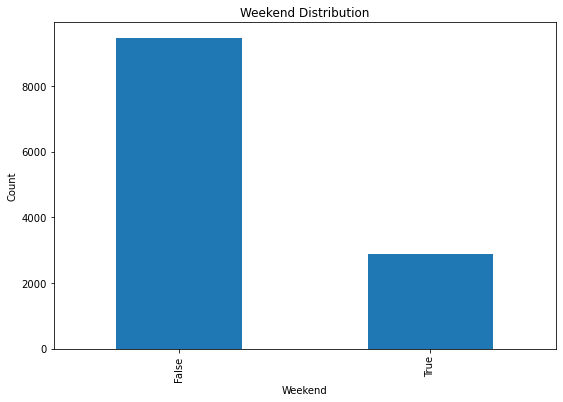

In [15]:
# Use bar chart to see the Weekend distribution 
fig, ax = plt.subplots(figsize=(9, 6))
df["Weekend"].value_counts().plot(kind = "bar",  title = "Weekend Distribution", ax=ax)

#set lable for the chart
plt.xlabel("Weekend")
plt.ylabel("Count")

### Weekend vs. Revenue

Text(0.5, 0.98, 'Revenue Based on Weekend')

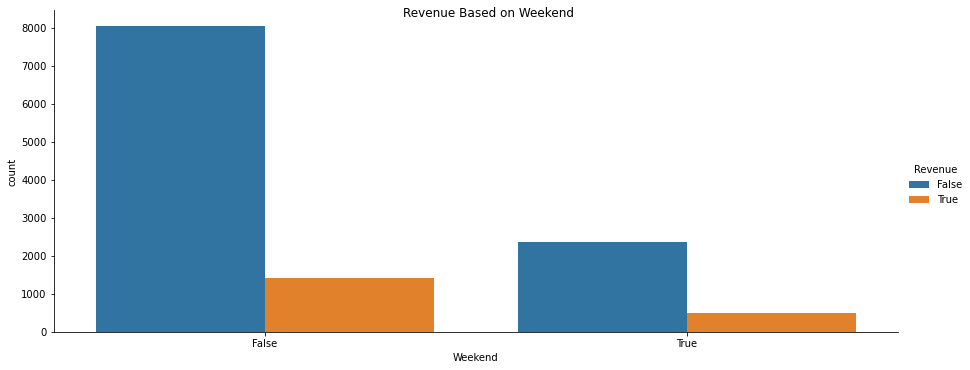

In [16]:
# See relation between number of customers who buy a product and those who did not with respect to weekdays / Weekend 
g = sns.catplot(x="Weekend", hue="Revenue", kind="count", aspect= 2.5, data=df)
g.fig.suptitle('Revenue Based on Weekend')


Here, we analyze the relation between Weekend Attribute and the class lable (Revenue). 
In fact, we see how weekdays users did or did not complete their purchase and we compare the result with weekends'users.

In [17]:
"""Weekdays"""

# total number of weekdays users
total_weekdays = df["Weekend"].value_counts()[0]
# number of weekdays' users who did not complete their purchase
Rev_F_weekdays = len(df[ (df["Weekend"] == False) & (df["Revenue"] == False) ]  )
# number of weekdays' users who did complete their purchase
Rev_Y_weekdays = len(df[ (df["Weekend"] == False) & (df["Revenue"] == True) ]  )


print(round((Rev_F_weekdays / total_weekdays)*100,2) , "% of weekdays'users" + colored(" did not complete", "red", attrs=['bold']), "their purchase on weekdays")
print(round((Rev_Y_weekdays / total_weekdays)*100,2), "% of weekdays'users" + colored(" did complete ", "blue", attrs=['bold']) + "their purchase on weekdays")
      

        
    
print("")


"""Weekend"""
    
# total number of weekend users
total_weekend = len(df[df["Weekend"] == True]) 

# number of weekend's users who did not complete their purchase
Rev_F_weekend = len(df[ (df["Weekend"] == True) & (df["Revenue"] == False) ]  )

# number of weekend's users who did complete their purchase
Rev_Y_weekend = len(df[ (df["Weekend"] == True) & (df["Revenue"] == True) ]  )

print(round((Rev_F_weekend / total_weekend)*100,2) , "% of weekends'users" + colored(" did not complete", "red", attrs=['bold']), "their purchase on weekend")
print(round(Rev_Y_weekend / total_weekend*100,2) , "% of weekends'users" + colored(" did complete", "blue", attrs=['bold']), "their purchase on weekend")

 
    
      
    
print("")  
    
"""Total Purchase Based on Weekend Attribute"""



print(round((Rev_Y_weekdays / (Rev_Y_weekend + Rev_Y_weekdays)  )*100,2), "% of total purchase" + colored(" is not", "red", attrs=['bold']), "on" + colored(" Weekend", "green", attrs=['bold']))
print(round((Rev_Y_weekend / (Rev_Y_weekend + Rev_Y_weekdays))*100,2), "% of total purchase" + colored(" is    ", "blue", attrs=['bold']), "on" + colored(" Weekend", "green", attrs=['bold']))




85.11 % of weekdays'users did not complete their purchase on weekdays
14.89 % of weekdays'users did complete their purchase on weekdays

82.6 % of weekends'users did not complete their purchase on weekend
17.4 % of weekends'users did complete their purchase on weekend

73.85 % of total purchase is not on Weekend
26.15 % of total purchase is     on Weekend


<b> Observation 2:</b>

1. Revenue is less on weekend and more on weekdays. 


###  VisitorType 

VisitorType attribute is on of two categorical attributes that has object data type. 

In [84]:
# Get unique value in VisitorType Column
df["VisitorType"].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

We have three visitor type: 
1. Returning_Visitor <br> 
2. New_Visitor <br>  
3. Other

In [85]:
# Count number of values in each type 
df["VisitorType"].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Text(0, 0.5, 'Count')

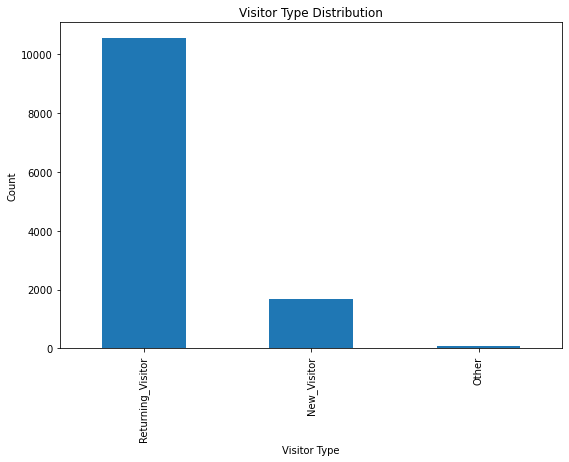

In [86]:
# Use bar chart to see the Weekend distribution 
fig, ax = plt.subplots(figsize=(9, 6))
df["VisitorType"].value_counts().plot(kind = "bar",  title = "Visitor Type Distribution", ax=ax)

#set lable for the chart
plt.xlabel("Visitor Type")
plt.ylabel("Count")

The number of "Other" type is significantly less than Returning_Visitor and New_Visitor types. In order to have a better understanding of number of each visitor type (and their percentage), we use the pie chart. 

<AxesSubplot:ylabel='VisitorType'>

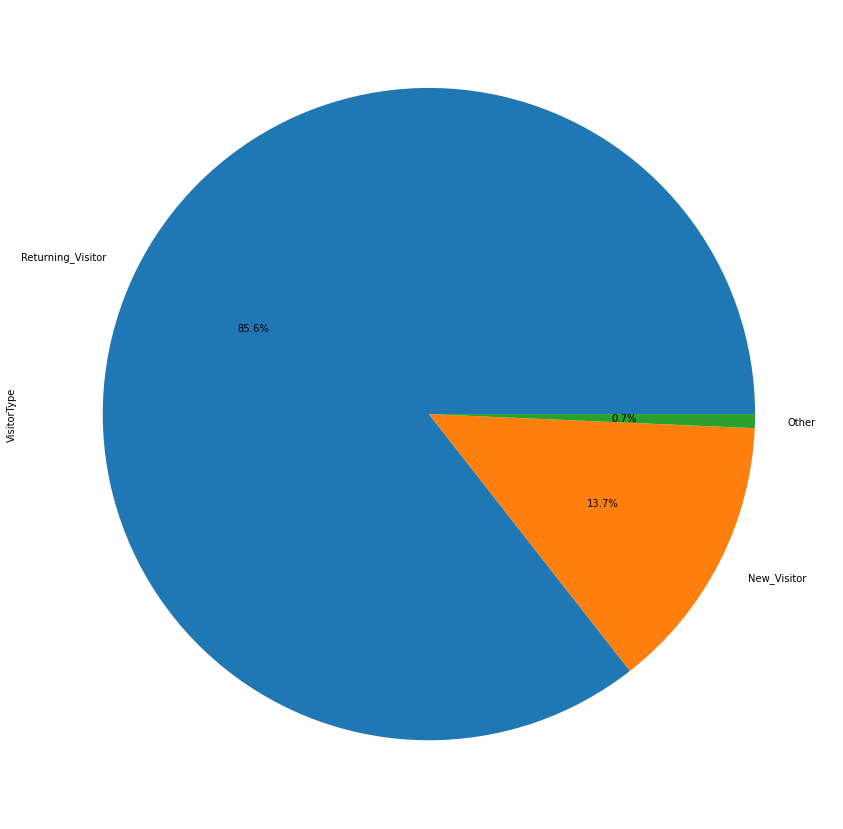

In [87]:
# Use pie chart to see the Weekend distribution 
df["VisitorType"].value_counts().plot(kind = "pie",  figsize=(15, 15), legend=False, autopct='%1.1f%%' )

### VisitorType vs. Revenue 

Text(0.5, 0.98, 'Revenue Based on Visitor Type')

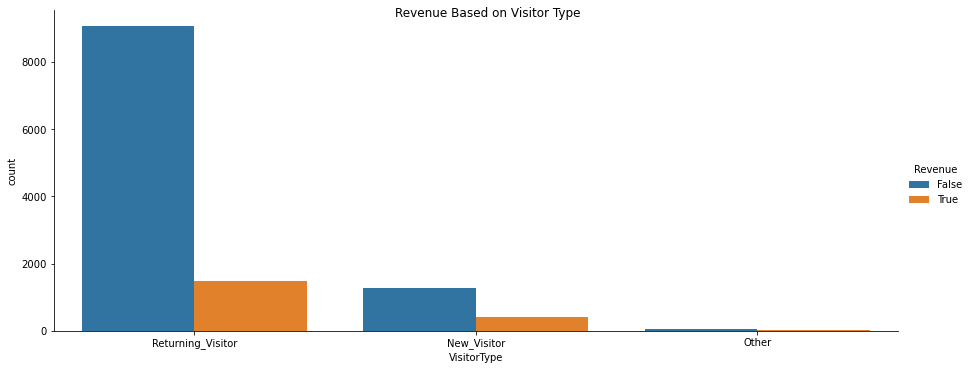

In [88]:
# See relation between number of customers who buy a product and those who did not with respect to their visitor type 
h = sns.catplot(x='VisitorType', hue="Revenue", kind="count", aspect= 2.5, data=df)
h.fig.suptitle('Revenue Based on Visitor Type')

Here, we analyze the relation between VisitorType Attribute and the class lable (Revenue). 

In [89]:
"""Returning Visitor"""

# total number of Returning Visitor
total_Returning = df["VisitorType"].value_counts()[0]
# number of Returning Visitor who did not complete their purchase
Rev_F_Returning  = len(df[ (df["VisitorType"] == "Returning_Visitor") & (df["Revenue"] == False) ] )
# number of Returning Visitor who did not complete their purchase
Rev_Y_Returning = len(df[ (df["VisitorType"] == "Returning_Visitor") & (df["Revenue"] == True) ]  )


print(round((Rev_F_Returning / total_Returning)*100,2) , "% of returning users" + colored(" did not complete", "red", attrs=['bold']), "their purchase")
print(round( (Rev_Y_Returning / total_Returning) * 100,2), "% of returning users " + colored("did complete ", "blue", attrs=['bold']) + "their purchase")




print("")   

"New Visitor"
    
# total number of New Visitor    
total_New = df["VisitorType"].value_counts()[1]               
# number of New Visitor who did not complete their purchase
Rev_F_New  = len(df[ (df["VisitorType"] == "New_Visitor") & (df["Revenue"] == False) ]  )
# number of New Visitor who did  complete their purchase
Rev_Y_New = len(df[ (df["VisitorType"] == "New_Visitor") & (df["Revenue"] == True) ]  )


print(round((Rev_F_New / total_New)*100,2) , "% of New users" + colored(" did not complete", "red", attrs=['bold']), "their purchase")
print(round((Rev_Y_New / total_New)*100,2), "% of New users " + colored("did complete ", "blue", attrs=['bold']) + "their purchase")
  
    
    
print("")    
   
"Other Visitor" 
    
# total number of Other Visitor       
total_Other = df["VisitorType"].value_counts()[2]    
# number of Other Visitor who did not complete their purchase
Rev_F_Other  = len(df[ (df["VisitorType"] == "Other") & (df["Revenue"] == False) ]  )
# number of Other Visitor who did not complete their purchase
Rev_Y_Other = len(df[ (df["VisitorType"] == "Other") & (df["Revenue"] == True) ]  )


print(round((Rev_F_Other / total_Other)*100,2) , "% of Other users" + colored(" did not complete", "red", attrs=['bold']), "their purchase")    
print(round((Rev_Y_Other / total_Other)*100,2), "% of Other users " + colored("did complete ", "blue", attrs=['bold']) + "their purchase")
      

    
print("")    


"""Total Purchase Based on VisitorType Attribute"""

# get total Purchase   


print(round((Rev_Y_Returning / (Rev_Y_Returning + Rev_Y_New + Rev_Y_Other)  )*100,2), "% of total purchase made by "+ colored(" Returning Visitors", attrs=['bold']))
print(round((Rev_Y_New / (Rev_Y_Returning + Rev_Y_New + Rev_Y_Other))*100,2), "% of total purchase made by "  + colored(" New Visitors", attrs=['bold']))
print(round((Rev_Y_Other / (Rev_Y_Returning + Rev_Y_New + Rev_Y_Other))*100,2), "%  of total purchase made by " + colored(" Other Visitors", attrs=['bold']))


86.07 % of returning users did not complete their purchase
13.93 % of returning users did complete their purchase

75.09 % of New users did not complete their purchase
24.91 % of New users did complete their purchase

81.18 % of Other users did not complete their purchase
18.82 % of Other users did complete their purchase

77.04 % of total purchase made by  Returning Visitors
22.12 % of total purchase made by  New Visitors
0.84 %  of total purchase made by  Other Visitors


<b>Observation 3</b>

1. The highest Revenue is for Returning Visitors. 
2. More than 99% of visitors are either Returning or New. We may focus on these types to improve the business.

###  Month 

Month attribute is the second categorical attribute that has object data type. We learn more about this attribute and its relattion with the class lable (Revenue). 

In [90]:
# Get unique value in Month Column
df["Month"].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [91]:
# Count number of values in each category  
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Text(0, 0.5, 'Count')

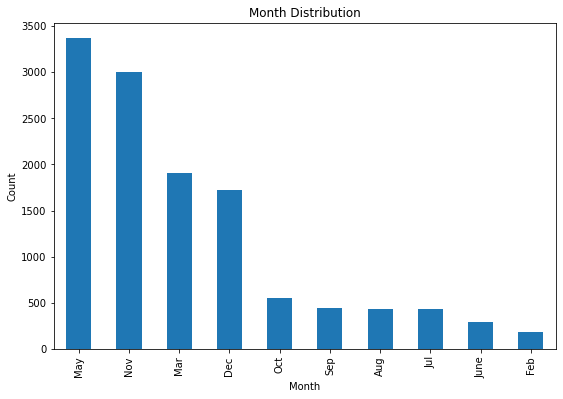

In [92]:
# Use bar chart to see the Month distribution 
fig, ax = plt.subplots(figsize=(9, 6))
df["Month"].value_counts().plot(kind = "bar", title = "Month Distribution", ax=ax)


#set lable for the chart
plt.xlabel("Month")
plt.ylabel("Count")

<AxesSubplot:ylabel='Month'>

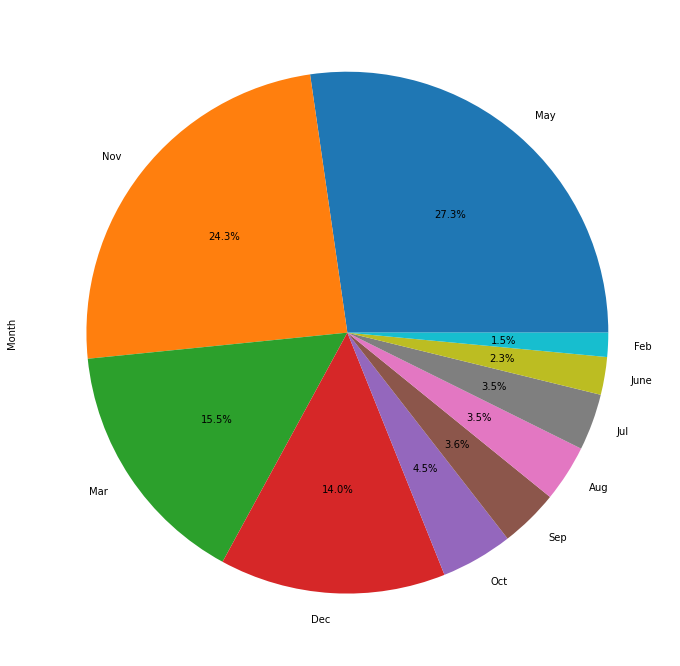

In [93]:
# Use pie chart to see the Month distribution 
df["Month"].value_counts().plot(kind = "pie",  figsize=(15, 12), legend=False,  autopct='%1.1f%%' )

### Month vs. Revenue

Text(0.5, 0.98, 'Revenue Based on Month')

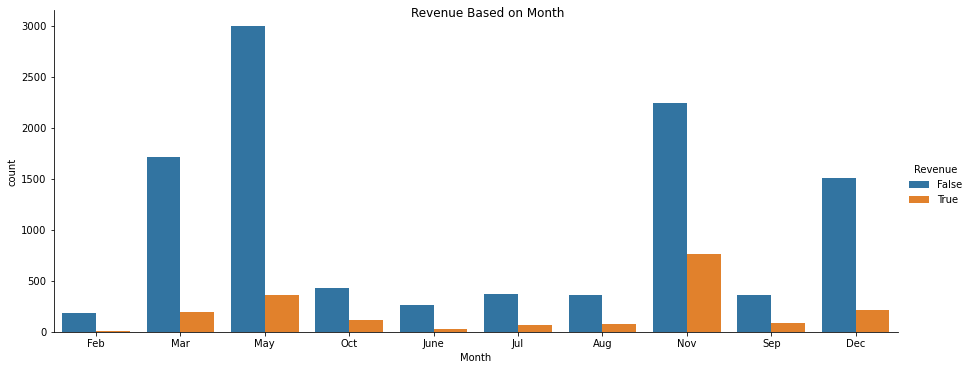

In [94]:
# See relation between number of customers who buy a product and those who did not with respect to Month attribute 
g1 = sns.catplot(x='Month', hue="Revenue", kind="count", aspect= 2.5, data=df)
g1.fig.suptitle('Revenue Based on Month')

<b> Observation 4  </b>

1. The highest Revenue is in Nov month. It means that more users completed the purchase in November. 
2. We do not have pageviews in January and April !
3. Maximum pageview happended in May
4. More than 80% of pageview happended in Mar, May, Nov and Dec. We may focus on these month to increase the revenue. 

### Other Categorical columns

In this section, we analyze the remaining categorical attribute. 

In [95]:
# create a list including the remaining categorical attributes
Other_Categorical_columns = ['Browser', 'Region', 'OperatingSystems' , 'TrafficType']

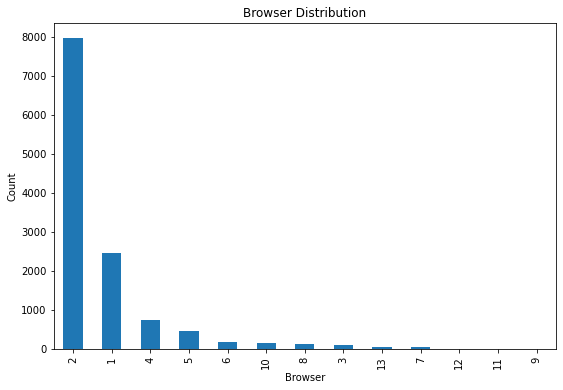

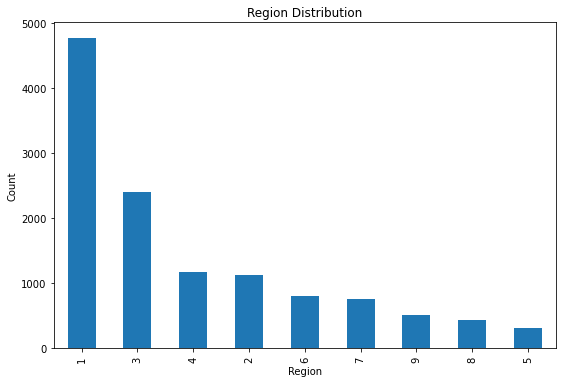

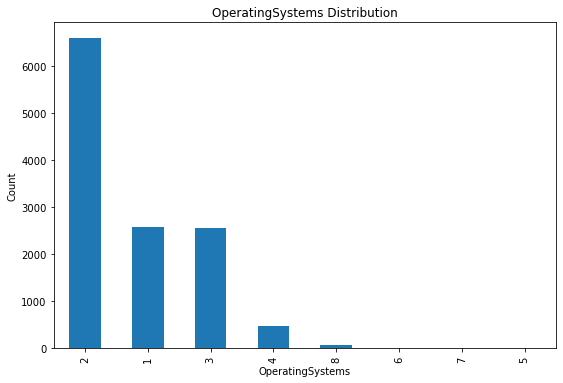

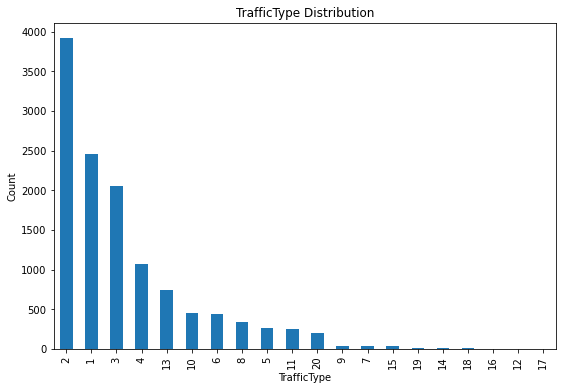

In [96]:
#plot the bar chart for the remaining categorical attributes
for col in Other_Categorical_columns:
    fig, ax = plt.subplots(figsize=(9, 6))
    df[col].value_counts().plot(kind = "bar", title = col + " Distribution")

    plt.xlabel(col)
    
    plt.ylabel("Count")
    plt.show()

There are more than 5 categories in each attribute. So, we want to obtain a better understanding about the distrubion of these categorical attributes. So, we plot the pie chart for the top counts in each columns. Therefore, we can indentify which categories in an attribute have more impact on that attribute. 

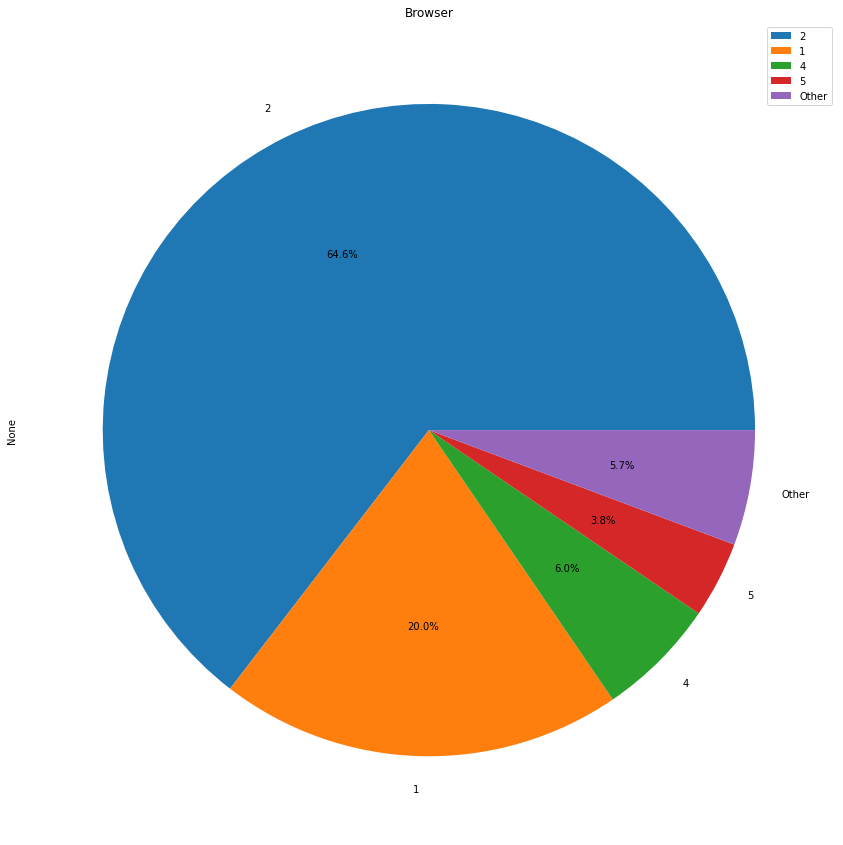

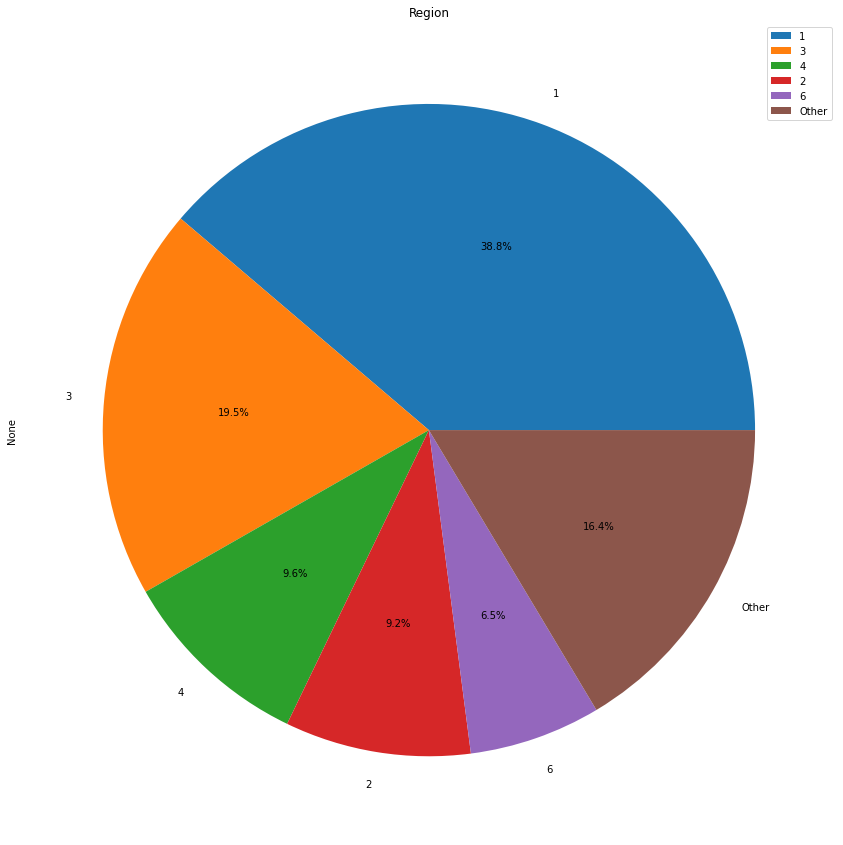

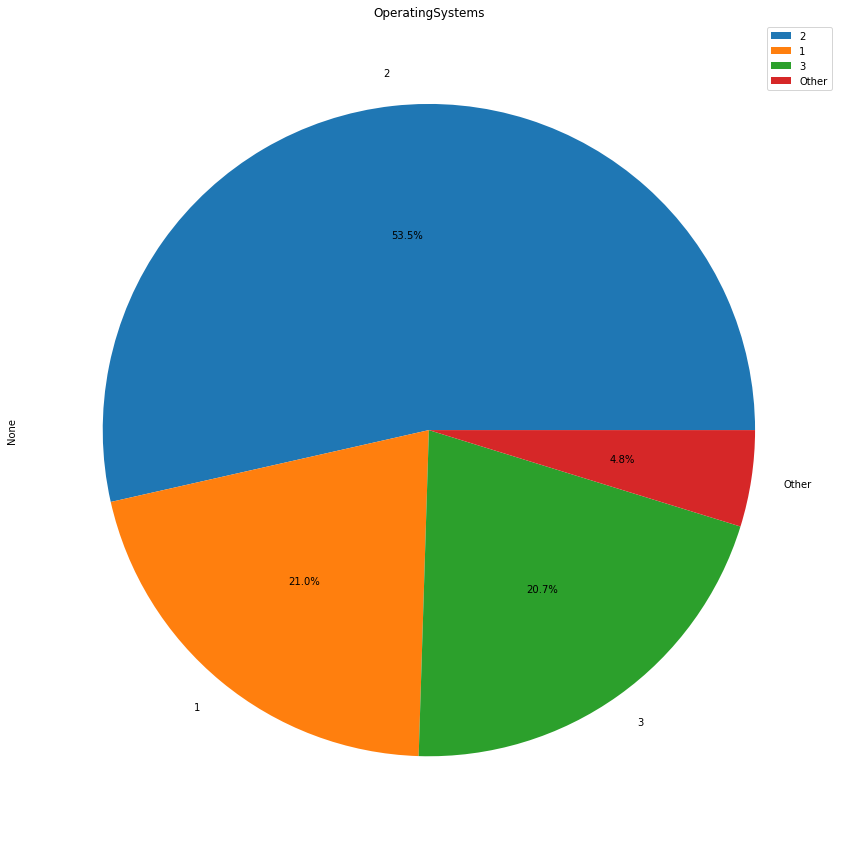

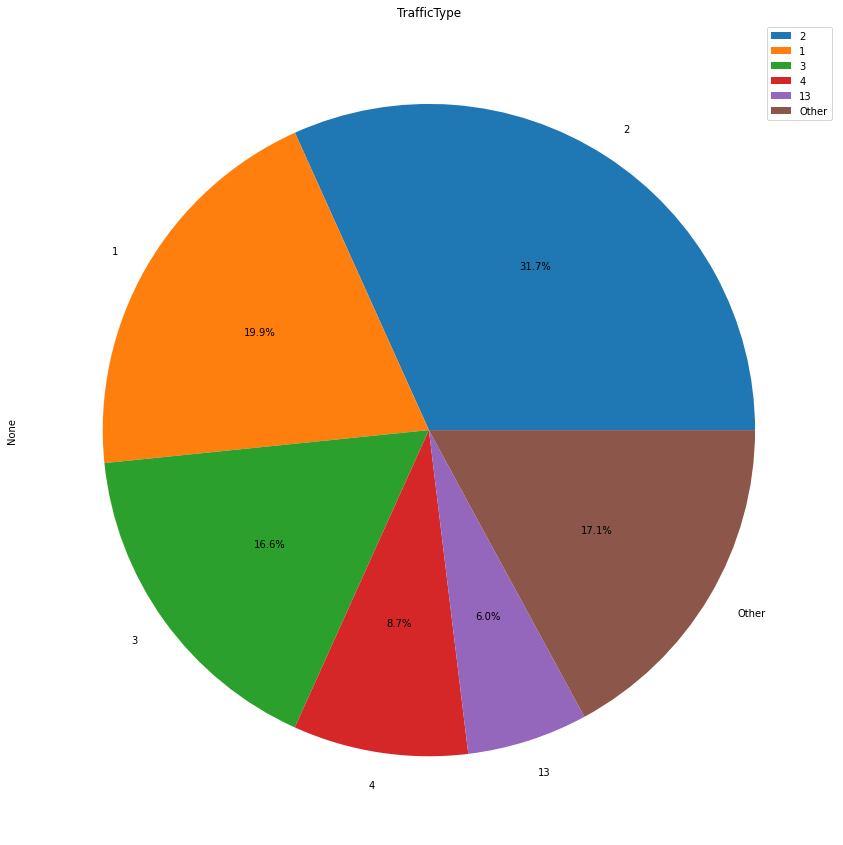

In [97]:
# define a function that give us the top counts in each attribute
# Note that we need to have different number of top counts. Because number of categories are different. 

def cut(col):
    if col == 'Browser':
        alpha = 4
    if col == 'Region':
        alpha = 5
    if col == "OperatingSystems":
        alpha = 3
    if col == 'TrafficType':
        alpha = 5
    return alpha
        

# plot the pie chart for the top couns in the remaining categorical attributes
for col in Other_Categorical_columns:
    #compute the total values other for df[col].value_counts()[alpha:]
    remaining = sum(df[col].value_counts()) - sum(df[col].value_counts()[:cut(col)])
    
    # Create a single entry Series 
    other = pd.Series([remaining])
    index = ['Other']
    other.index = index
    
    #create pd.Series including 5 highetst and other 
    pie_numerical = df[col].value_counts()[:cut(col)].append(other)
    
    pie_numerical.plot(kind = "pie", figsize=(15, 15), legend=True, autopct='%1.1f%%')
    plt.title(col)
    plt.show()

### Observation 5:


<b>Browser:</b> There are 13 different Browsers types. Types 2 and 1 are top two Browsers which are covered 84.6% of this dataset. So, we should focus on them to improve the business.


<b>OperatingSystems:</b> There are 8 different Operating Systems types. Types 2, 1 and 3 are top three Operating Systems which are covered 95.2% of this dataset.  So, we should focus on them to improve the business.


<b>Region:</b> The distribution of 9 region types in Region attribute is more even compare to other attributes. 

<b>TrafficType:</b> Between 20 categories, type 2, 1 and 3 are top three Operating Systems which are covered 68.2% of this dataset. 






### Other Categorical columns vs. Revenue

Finally, we investigate the relation between the remaining categorical attributes and the class lable (Revenue).

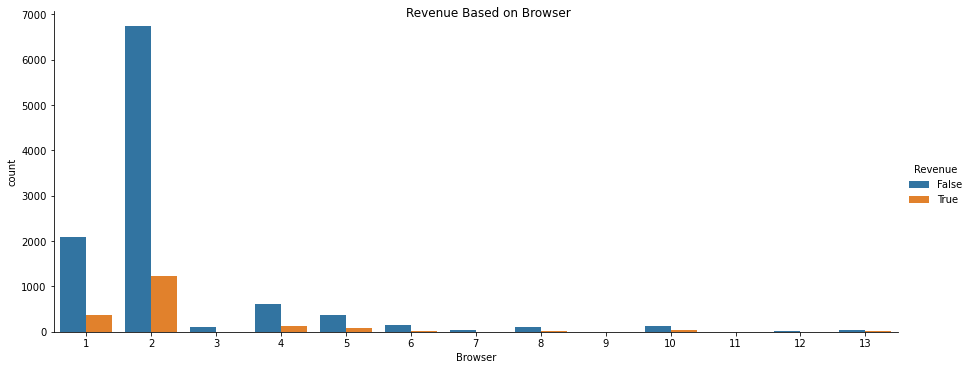

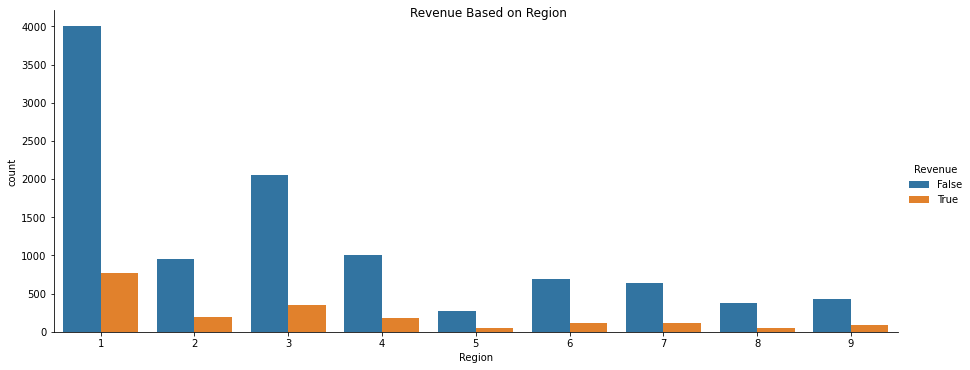

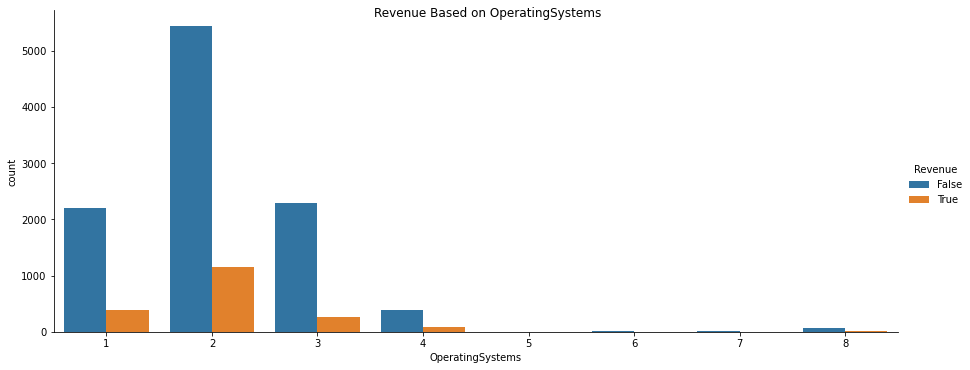

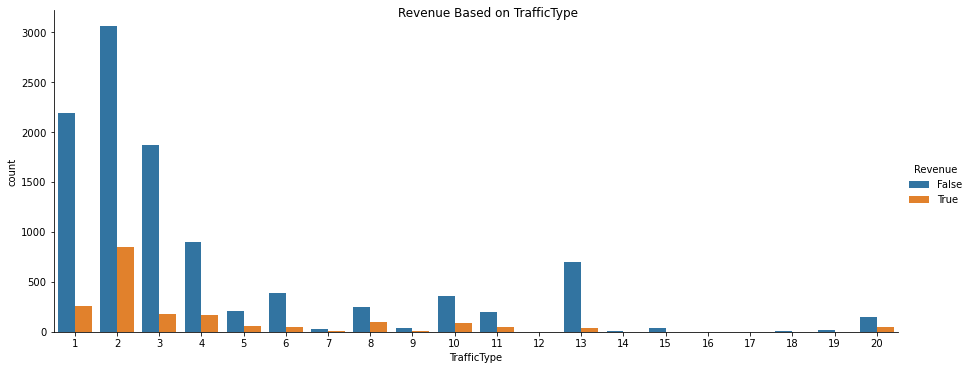

In [98]:
for col in Other_Categorical_columns:
    sns.catplot(x= col, hue="Revenue", kind="count", aspect= 2.5, data=df).fig.suptitle('Revenue Based on ' + col)

<b>Observation 6:</b>

1. Type 2 in Browser attribute has the highest Revenue. 
1. Type 1 in Region attribute has the highest Revenue. 
1. Type 2 in OperatingSystems attribute has the highest Revenue. 
1. Type 2 in TrafficType attribute has the highest Revenue. 

## 3.3.2 Numerical Columns

We now ready to analyze the numerical attributes. Our first goal is to see the distrubution in these attributes. 
Then, we investigate the realtion between each of these attributes and the class lable (Revenue). 

In [99]:
# creat a data frame including the numerical attributes
Categorical_columns = ['Revenue','VisitorType','Weekend', 'Browser', 'Region', 'OperatingSystems', 'Month' , 'TrafficType']
df_numerical_columns = df.drop(columns=Categorical_columns)
df_numerical_columns

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0


### Numerical Attributes Distribution

Let us look at the distribution of numerical attributes

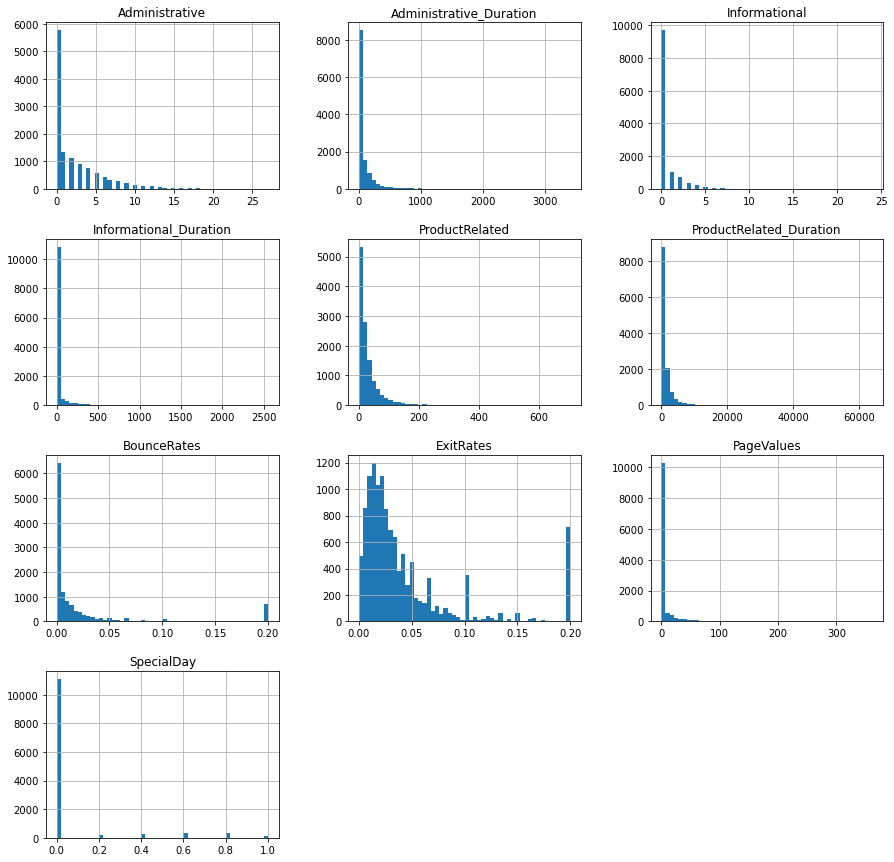

In [100]:
# hist plot for all numerical columns
df_numerical_columns.hist(bins=50, figsize=(15,15))
plt.show()

Data is not distributed evenly and most of the columns have outliers. We identify them better using the boxplot

### Numerical Attributes Outliers

Administrative


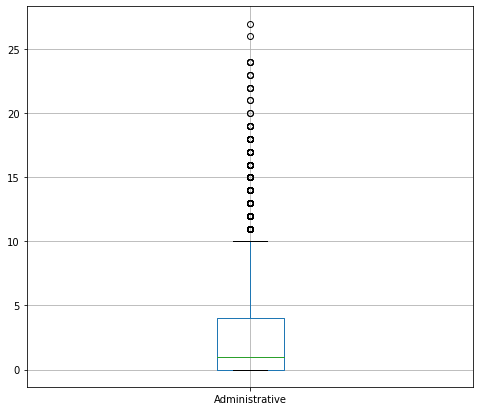

Administrative_Duration


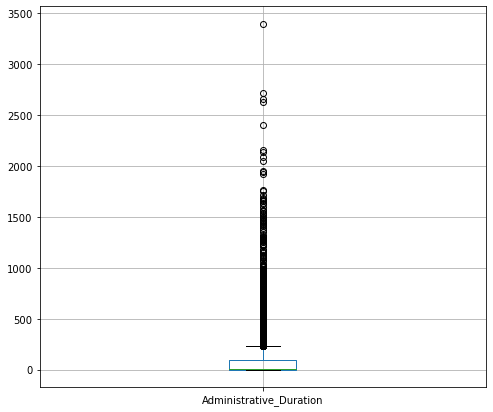

Informational


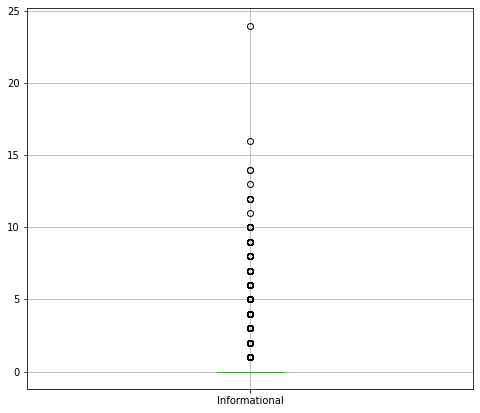

Informational_Duration


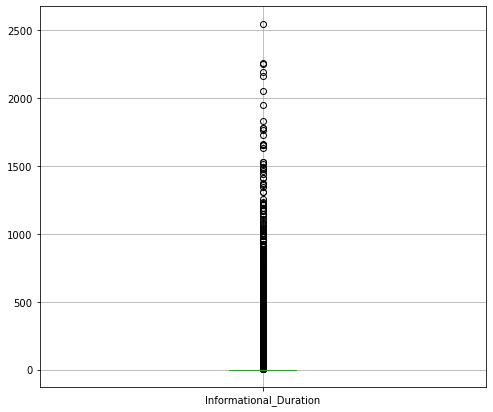

ProductRelated


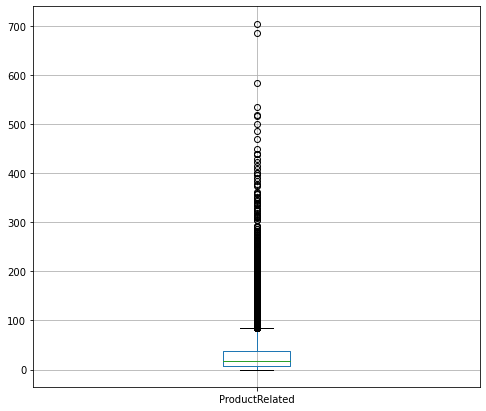

ProductRelated_Duration


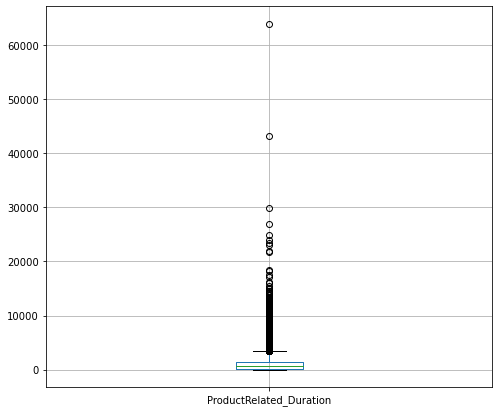

BounceRates


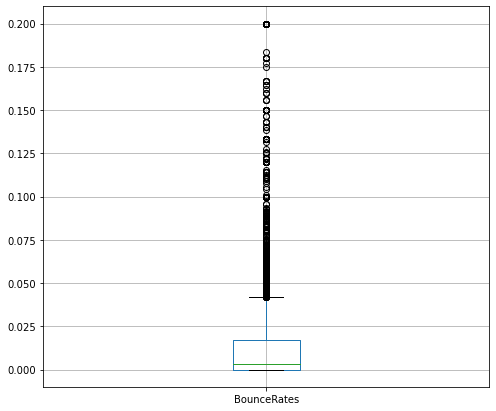

ExitRates


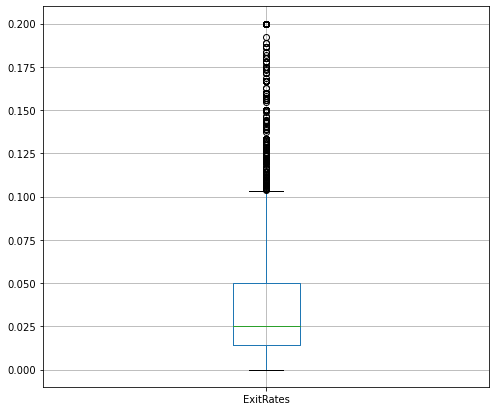

PageValues


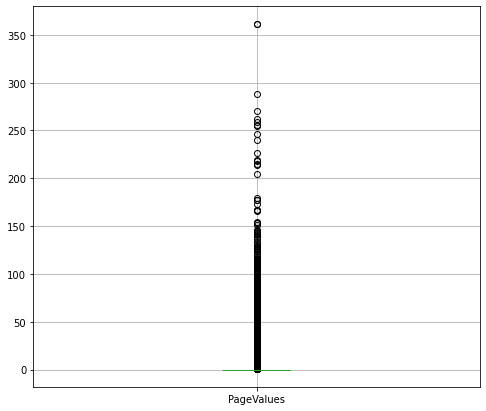

SpecialDay


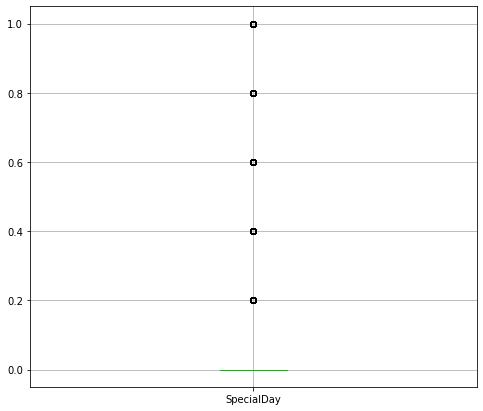

In [101]:
# using the boxplot, we study the outliers in each numerical columns
for i,el in enumerate(list(df_numerical_columns.columns.values)):
    #df_numerical_columns.boxplot(figsize=(15,15));
    print(el)
    df.boxplot(el,figsize=(8,7))
    plt.show()

### Numerical Attributes vs. Revenue

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


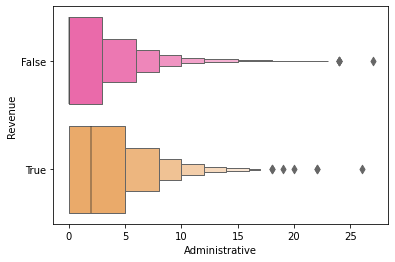

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


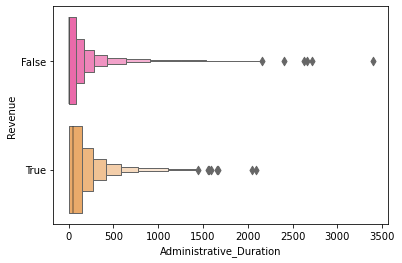

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


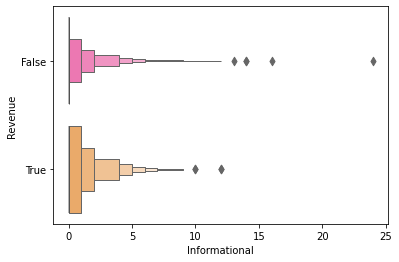

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


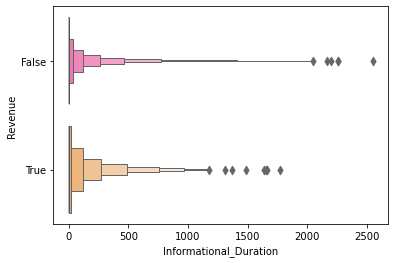

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


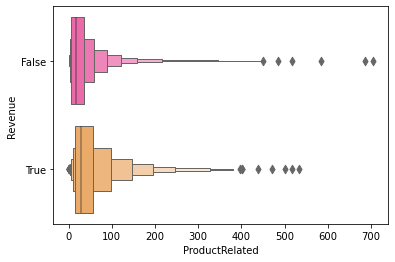

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


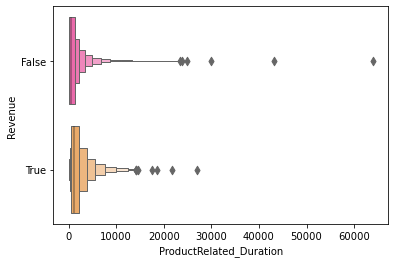

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


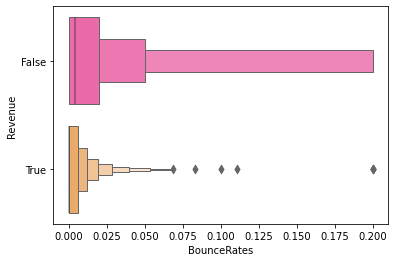

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


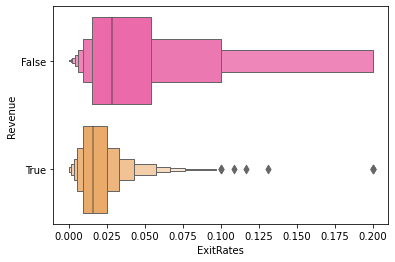

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


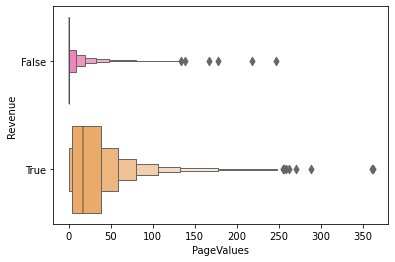

/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


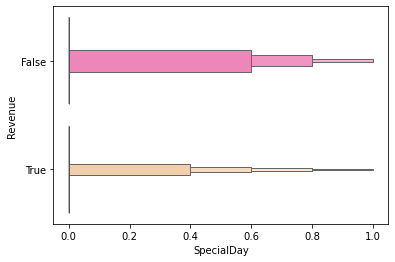

In [102]:
# using the boxplot, we study the outliers in each numerical columns
for i,el in enumerate(list(df_numerical_columns.columns.values)):
    #plt.subplot(2, 2, 3)
    sns.boxenplot(df[el], df['Revenue'], palette = 'spring', orient='h')
    #print(el)
    #df.boxplot(el)
    plt.show()

<b>Observation 7:</b>

1. Data is not distributed evenly. So, we need to do the Normalization/Standardization on the dataset. 
2. We have outliers in all of the numerical columns.
3. Most of the attributes are exponentially distributed for both purchased(True) or not puchased(False)
4. For the following attributes, there are many outliers in not puchased(False):

    Administrative_Duration <br>
    Informational_Duration<br>
    ProductRelated<br>
    ProductRelatedDuration<br>
    PageValues<br>



5. For the following attributes, there are many outliers in puchased(True):

    Administrative_Duration <br>
    ProductRelated <br>
    Informational_Duration <br>
    ProductRelatedDuration <br>
    BounceRate <br>
    ExitRate <br>
    PageValues <br>


## 3.4 Data Cleaning

There are two boolean categorical attributes (Revenue and Weekend) and there are two object categorical attributes (Month and VisitorType). In order to do more analysis on the data set, we need to encoded these fours categorical attributtes to numerical values. 

### Encoding Categorical Values

#### Cleaning Column Month

In [103]:
"""Month: There are 10 months in Month column. 
   We do not have January (1th month of year) and April(4th month of year) """

# Each month will be assigned to its corresponding number of month
Month_to_num = {'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9, 'Dec':12}

#### Cleaning Column VisitorType

In [104]:
# there are three visitor types. We assign them values 1, 2, 3 
VisitorType_to_num = {'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}

#### Cleaning Attribute Weekend and Revenue

In [105]:
# create a dictionary for boolean (False/True) to Binary (0/1) 
Boolean_to_binary = {True:1,False:0}

#### We use .replace( ) to clean the data and replace categorical variables with numerical values. 

In [106]:
#create a dictionary that transform  categorical to numerical

cleaning = {"Month": Month_to_num,
            "VisitorType": VisitorType_to_num,
            "Revenue": Boolean_to_binary,
            "Weekend": Boolean_to_binary }


# use df.replace() to clean the data set and create new data frame (df_cleaned)
df_cleaned = df.replace(cleaning, inplace = False)
df_cleaned

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,3,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,3,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,3,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,3,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,3,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,3,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,3,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,3,0,0


<b>Important Note:</b>
We can use other methods to clean the data. 

1. For boolean columns:  Use "lambda" function and ".apply()" 
                     
                    df['Weekend'] = df['Weekend'].apply(lambda x: 0 if x == False else 1 )
                    df['Revenue'] = df['Revenue'].apply(lambda x: 0 if x == False else 1 )
                    
2. For object columns:  Use ".map( )"

                    df['Month']=df['Month'].map(Month)
                    df['VisitorType']=df['VisitorType'].map(VisitorType)
                    
3. Another method: Directly use ".get_dummies()" to entire dataset.

                    pd.get_dummies(data)

Note that .get_dummies( ) will add 11 columns to the dataset. So, we do not use this method to clean this data set. 



In [107]:
#check the data type for df_cleaned (after encoding)
df_cleaned.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

## 3.5 Correlation Matrix

In this section, we study the correlation between all attributes in the dateset. For that, we do the following steps:

<b>First Step:</b>  We will find correlations between all attributes in the dateset, and will sort them in descending order. 

<b>Second Step:</b> We will find the correlations between the class lable (Revenue) and other 17 attributes. 
             Then, we present the attributes that have the highest and the lowest correlation with Revenue.

<AxesSubplot:>

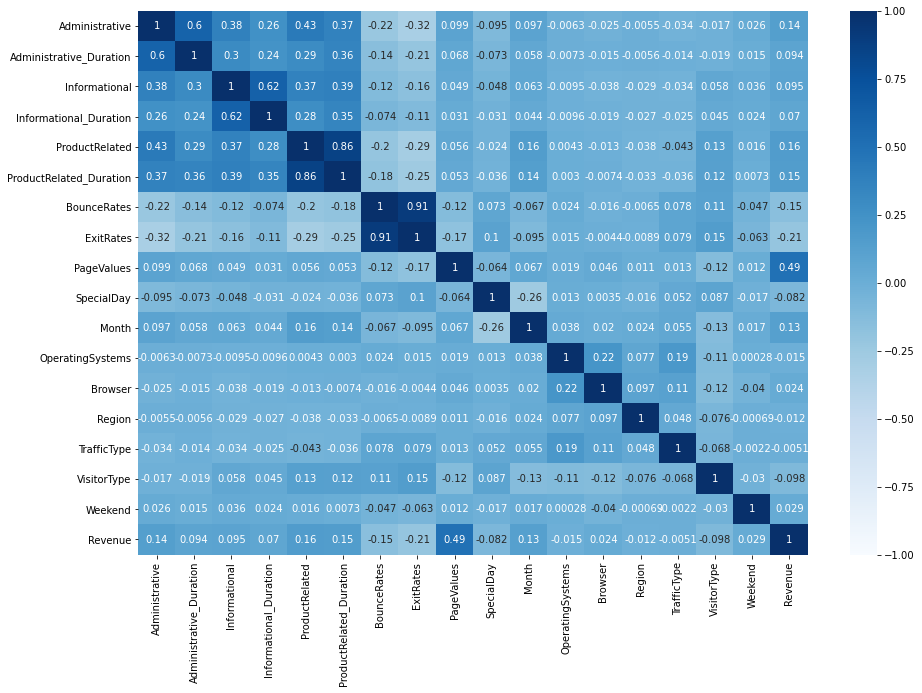

In [108]:
"""Since we have 18 columns, correlation matrix would be pretty big. Therefore it is best to visualize 
the correlation matrix. """

#create the correlation dataframe 
corr = df_cleaned.corr()

# use heatmap in seaborn library to visualize the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="Blues",annot=True, center=0, vmin=-1, vmax=1)

<b>Observation 8:</b>


1. We need to ignore the diagonal values, since that is correlation of variable with itself. 

2. We also note that values to the left and right of diagonal are mirror image of each other. 

3. The greater the correlation between variables, the darker the box is. Hence, we don't need to print the value in each box, since it makes our heatmap ugly. 

4. We can look at the color of the box to conclude which are the variables with high correlation.



<AxesSubplot:>

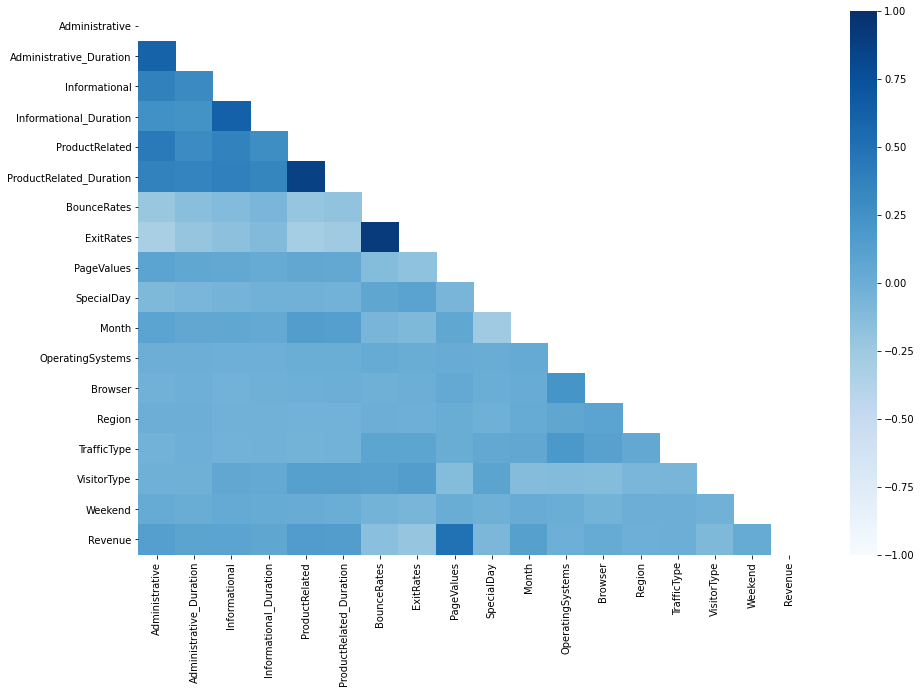

In [109]:
# let create a mask to cover the right of diagonal in the correlation matrix
mask = np.triu(np.ones_like(corr))

# visualize the left of diagonal in the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap= "Blues", center=0, vmin=-1, vmax=1) 

We can print the values of correlation matrix in the descending order. Of course it doesn't make sense to print the diagonal values since they will be 1. Let us just filter out the diagonal values. We now create a data frame to see correlation bewteen any two attributes in the dataset

In [110]:
# we create a pd.Series including correlation less than 1 and we remove the duplicates
c = corr[corr < 1].unstack().transpose()\
    .sort_values(ascending=False)\
    .drop_duplicates()

# 1. create a dataframe from the pd.Series that has correlation result 
# 2. drop the nan values
df_corr = pd.DataFrame(c.reset_index()).dropna()

#rename the df_corr column
df_corr.rename(columns={'level_0': 'Attribute One', 'level_1':'Attribute Two' , 0:'Correlation'}, inplace=True)


In [111]:
print("The following attributes have the highest correlations in the dataset:")

df_corr.head(5)

The following attributes have the highest correlations in the dataset:


,Attribute One,Attribute Two,Correlation
0,ExitRates,BounceRates,0.913004
1,ProductRelated,ProductRelated_Duration,0.860927
2,Informational,Informational_Duration,0.618955
3,Administrative,Administrative_Duration,0.601583
4,PageValues,Revenue,0.492569


In [112]:
print("The following attributes have the lowest correlations in the dataset:")

df_corr.tail(5)

The following attributes have the lowest correlations in the dataset:


,Attribute One,Attribute Two,Correlation
148,Administrative,BounceRates,-0.223563
149,ExitRates,ProductRelated_Duration,-0.251984
150,SpecialDay,Month,-0.256901
151,ProductRelated,ExitRates,-0.292526
152,Administrative,ExitRates,-0.316483


<b>Observation 9:</b>
    
1.  Overall, there is no good correlation between attributes in the dataset.
2.  BounceRate and ExitRate have a good (the best) correlation in the dataset.
3.  Administrative and ExitRate has the worst correlation in the dataset. 

An important factor in our analysis is to see the correlation between the class label (Revenue) and other attributes in the data set. 

In [113]:
# create a dataframe including the correlation between the class lable andother attributes
df_Revenue_Corr = pd.DataFrame(df.corr()['Revenue']).sort_values(by=["Revenue"], ascending=False)[1:]
df_Revenue_Corr

,Revenue
PageValues,0.492569
ProductRelated,0.158538
ProductRelated_Duration,0.152373
Administrative,0.138917
Informational,0.095200
Administrative_Duration,0.093587
Informational_Duration,0.070345
Weekend,0.029295
Browser,0.023984
TrafficType,-0.005113


/Users/shaya/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


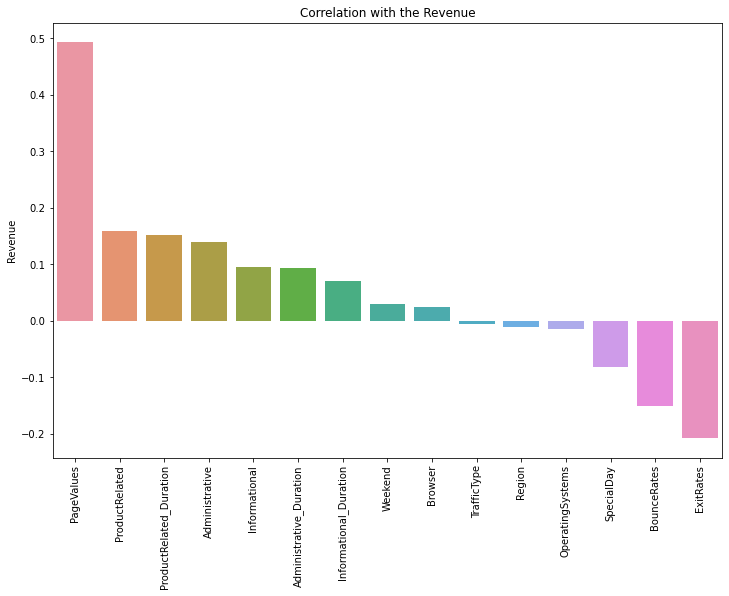

In [114]:
# Visualization of Correlation between Revenue and other attributes
plt.figure(figsize=(12,8))
sns.barplot(df_Revenue_Corr.index, df_Revenue_Corr["Revenue"]).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)
plt.show()

<b>Observation 10:</b>

    
1.  Overall, there is no good correlation between the class lable (Revenue) and other attributes.
2.  PageValues has the best correlation with the class lable (Revenue).
3.  ExitRates has the worst correlation with the class lable (Revenue).

## 3.6  Pre-processing and Standardization

First, we collect the dependent y and independent X variables.


In [115]:
#get the independent columns (X)
X = df_cleaned.drop(["Revenue"], axis = 1)
print(X)


# get the class lable (dependent) column (y)
y = df_cleaned["Revenue"]
print(y)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

Our analysis showed that the dataset is not evenly distributed. Therefore, we need to normalize the independent variables X to improve our models performances. 

In [116]:
#import StandardScaler
from sklearn.preprocessing import StandardScaler
# preprocessing and normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X).astype(float)
X

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.76262903,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.26573535,
         0.40102509, -0.55055169],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  2.21873304,
         0.40102509,  1.81635987],
       [ 0.50722805, -0.03291592, -0.3964779 , ...,  1.72183936,
         0.40102509, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.51418219,
        -2.25167844,  1.81635987]])

## 3.7 Train-Test Split 

We now split the dataset into train and test sets. 

In [117]:
###import train_test_split
from sklearn.model_selection import train_test_split

# define the dependent and independent variables for train and test set 
# we choose test_size = 0.2
# we use Stratify split as it is useful when we’re classifying an imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,  stratify=y)


# print sizes of X_train, X_test, y_train, y_test
print ('X_train has size:', X_train.shape)
print ('y_train has size:', y_train.shape)
print ('X_test  has size:', X_test.shape)
print ('y_test  has size:', y_test.shape)

X_train has size: (9864, 17)
y_train has size: (9864,)
X_test  has size: (2466, 17)
y_test  has size: (2466,)


# 4. Online Shoppers Intention Prediction Models 

Our objective is to build a machine learning model to predict whether a customer will buy a product or not. We use the Revenue attribute as the class label. So, the target variable (Revenue) is a binary feature and we are dealing with a binary classification problem. Therefore, we approach the following binary classification technique to implement an efficient machine learning model to predict the online shoppers intention. 

1. K Nearest  Neighbors 
2. Logistic Regression  
3. Support  Vector Machine 
4. Decision  Tree 
5. Random Forest 
6. AdaBoost 



              

## 4.1.  K Nearest Neighbor (KNN) 

### 4.1.1 Import and Train the KNN Classifier

In [118]:
# import K nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier


#start the algorithm with k=5 which is the default number of neighbors for KNN Classifier
k = 5

# train the model
KNN = KNeighborsClassifier(n_neighbors = k ).fit(X_train,  y_train)

### 4.1.2 Prediction and Evaluation on Train Set - KNN Classifier

In [119]:
#Prediction on Train Set
y_pred_KNN = KNN.predict(X_train)


# get the report of model evaluation on Train Set
print(classification_report(y_train, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8338
           1       0.79      0.48      0.60      1526

    accuracy                           0.90      9864
   macro avg       0.85      0.73      0.77      9864
weighted avg       0.89      0.90      0.89      9864



### 4.1.3 Prediction and Evaluation on Test Set - KNN Classifier

In [120]:
# Predict on X_test
y_hat_KNN = KNN.predict(X_test)

# get the report of model evaluation on Test Set
print(classification_report(y_test, y_hat_KNN))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2084
           1       0.72      0.37      0.49       382

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



### 4.1.4 Confusion Matrix - KNN Classifier

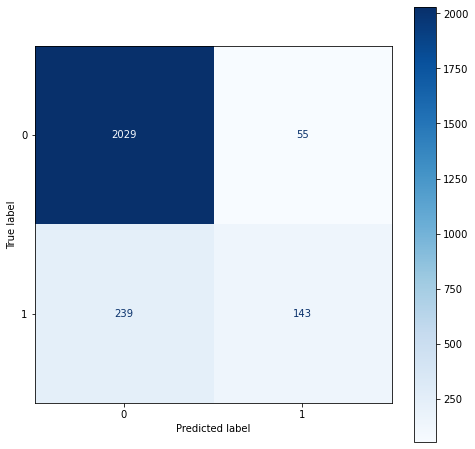

In [121]:
fig, ax = plt.subplots(figsize=(8, 8))

# plot the confusion matrix for the model
plot_confusion_matrix(KNN, X_test, y_test, cmap=plt.cm.Blues, ax = ax)  
plt.show() 

In [122]:
print( "The current accuracy is", metrics.accuracy_score(y_test, y_hat_KNN),". Can we have a better accuracy? ") 

The current accuracy is 0.8807785888077859 . Can we have a better accuracy? 


### 4.1.5 HyperParameter Tunning for the KNN Classifier

The hyperparameter k was initially set to be 5. We like to improve the performance of the KNN Classifier by tunning this hyperparameter (k). Then, we answer this question: For which value of k the KNN classifier has the best accuracy? 

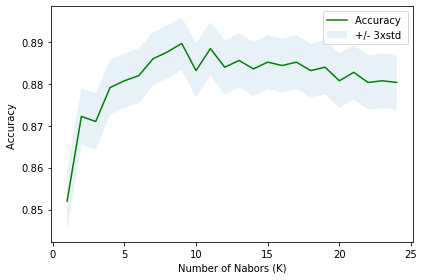

The best accuracy was with 0.8896999188969992 with k= 9


In [123]:
##We can calculate the accuracy of KNN for different Ks.

Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
    



#### Plot  model accuracy  for Different number of Neighbors 


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()



print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [124]:
print( "We can see that accuracy score increased from", round(metrics.accuracy_score(y_test, y_hat_KNN)*100,4),
      "to", round(mean_acc.max()*100,4), "by the Hyperparameter (k) Tunning") 

We can see that accuracy score increased from 88.0779 to 88.97 by the Hyperparameter (k) Tunning


### 4.1.6 Training/Prediction/Evaluation on Test Set after the Hyperparameter (k) Tunning  - KNN Classifier 

In [125]:
# define the best k
k_best = mean_acc.argmax()+1



#train the model with the best k
KNN = KNeighborsClassifier(n_neighbors = k_best ).fit(X_train,  y_train)


# Predict on X_test with the best k
y_hat_KNN = KNN.predict(X_test)


# get the report of model evaluation on Test Set with the best k
print(classification_report(y_test, y_hat_KNN))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2084
           1       0.82      0.37      0.51       382

    accuracy                           0.89      2466
   macro avg       0.86      0.68      0.72      2466
weighted avg       0.88      0.89      0.87      2466



### 4.1.7 Confusion Matrix - KNN Classifier after the Hyperparameter (k) Tunning

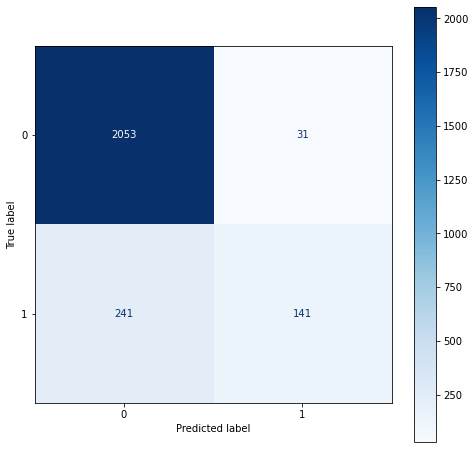

In [126]:
fig, ax = plt.subplots(figsize=(8, 8))

# plot the confusion matrix for the model
plot_confusion_matrix(KNN, X_test, y_test, cmap=plt.cm.Blues, ax = ax)  
plt.show()

## 4.2. Logistic Regresion  

### 4.2.1 Import and Train the Logistic Regression Classifier

In [127]:
# import LogisticRegression from Scikit-learn package.
from sklearn.linear_model import LogisticRegression


# train the model
LR = LogisticRegression().fit(X_train,y_train)


### 4.2.2 Prediction and Evaluation on Train Set - Logistic Regression Classifier

In [128]:
#Prediction on Train Set
y_pred_LR = LR.predict(X_train)

# get the report of model evaluation on Train Set
print(classification_report(y_train, y_pred_LR))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      8338
           1       0.74      0.36      0.48      1526

    accuracy                           0.88      9864
   macro avg       0.82      0.67      0.71      9864
weighted avg       0.87      0.88      0.86      9864



### 4.2.3 Prediction and Evaluation on Test Set - Logistic Regression Classifier

In [129]:
#Prediction on Test Set
y_hat_LR = LR.predict(X_test)


# get the report of model evaluation on Test Set
print(classification_report(y_test, y_hat_LR)) 


              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2084
           1       0.79      0.36      0.49       382

    accuracy                           0.89      2466
   macro avg       0.84      0.67      0.71      2466
weighted avg       0.88      0.89      0.87      2466



### 4.2.4 Predict Proba on Test Set - Logistic Regression Classifier

<b>predict_proba:</b>  returns estimates for all classes, ordered by the label of classes. 

1. The first column is the probability of class 1, P(Y=1|X)

2. The second column is the probability of class 0, P(Y=0|X)

In [130]:
# get the predict_proba
y_hat_LR_prob = LR.predict_proba(X_test)

# present the probability of Class 1 and 0 as a dataframe
Predict_Proba = pd.DataFrame(y_hat_LR_prob, columns = ['Probability of Class 1','Probability of Class 0'])
Predict_Proba.head()

,Probability of Class 1,Probability of Class 0
0,0.823867,0.176133
1,0.928262,0.071738
2,0.804167,0.195833
3,0.485772,0.514228
4,0.998228,0.001772


### 4.2.5 Confusion Matrix - Logistic Regression Classifier

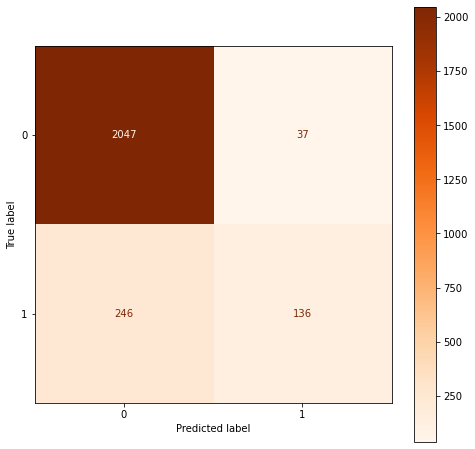

In [131]:
fig, ax = plt.subplots(figsize=(8, 8))

# plot the confusion matrix for the model
plot_confusion_matrix(LR, X_test, y_test, cmap=plt.cm.Oranges, ax=ax)  
plt.show() 

## 4.3.  Support Vector Machine (SVM) 

### 4.3.1 Import and Train the SVM Classifier

In [132]:
# import SVM from Scikit-learn package.
from sklearn import svm

#Train the model
SVM = svm.SVC().fit(X_train, y_train) 


### 4.3.2 Prediction and Evaluation on Train Set - SVM  Classifier

In [133]:
#Prediction on Train Set
y_pred_SVM = SVM.predict(X_train)

# get the report of model evaluation on Train Set
print(classification_report(y_train, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8338
           1       0.78      0.50      0.61      1526

    accuracy                           0.90      9864
   macro avg       0.85      0.74      0.78      9864
weighted avg       0.89      0.90      0.89      9864



### 4.3.3 Prediction and Evaluation on Test Set - SVM  Classifier

In [134]:
#Prediction on Test Set
y_hat_SVM = SVM.predict(X_test)


# get the report of model evaluation on Test Set
print(classification_report(y_test, y_hat_SVM))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2084
           1       0.79      0.45      0.57       382

    accuracy                           0.90      2466
   macro avg       0.85      0.71      0.76      2466
weighted avg       0.89      0.90      0.88      2466



### 4.3.4 Confusion Matrix - SVM Classifier

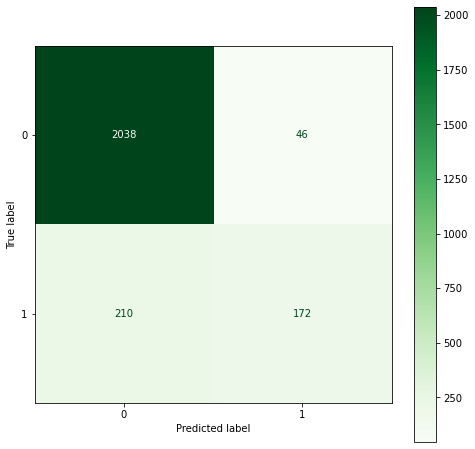

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))

# plot the confusion matrix for the model
plot_confusion_matrix(SVM, X_test, y_test, cmap=plt.cm.Greens, ax=ax)  
plt.show()

## 4.4. Decision Tree 

### 4.4.1 Import and Train the DecisionTreeClassifier

In [136]:
# import DecisionTreeClassifier from Scikit-learn package.
from sklearn.tree import DecisionTreeClassifier

#Train the model
DT = DecisionTreeClassifier().fit(X_train,y_train)

### 4.4.2 Prediction and Evaluation on Train Set - DecisionTreeClassifier

In [137]:
#Prediction on Train Set
y_pred_DT = DT.predict(X_train)

# get the report of model evaluation on Train Set
print(classification_report(y_train, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8338
           1       1.00      1.00      1.00      1526

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



### 4.4.3 Prediction and Evaluation on Test Set - DecisionTreeClassifier

In [138]:
#Prediction on Test Set
y_hat_DT = DT.predict(X_test)

# get the report of model evaluation on Test Set
print(classification_report(y_test, y_hat_DT))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2084
           1       0.59      0.54      0.56       382

    accuracy                           0.87      2466
   macro avg       0.75      0.74      0.74      2466
weighted avg       0.87      0.87      0.87      2466



### 4.4.4 Confusion Matrix - DecisionTreeClassifier

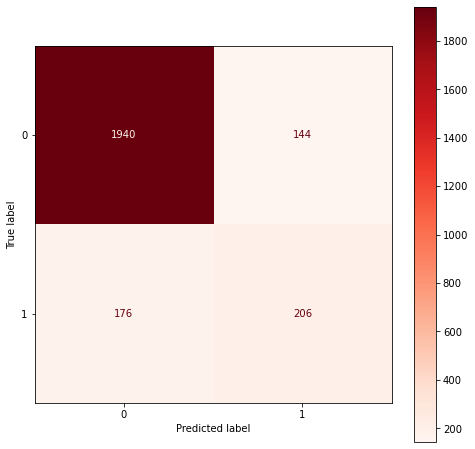

In [139]:
fig, ax = plt.subplots(figsize=(8, 8))

# plot the confusion matrix for the model
plot_confusion_matrix(DT, X_test, y_test, cmap=plt.cm.Reds, ax=ax)  
plt.show()

## 4.5. Random Forest

### 4.5.1 Import and Train the RandomForestClassifier

In [140]:
# import RandomForestClassifier from Scikit-learn package.
from sklearn.ensemble import RandomForestClassifier

# Train the model
RF = RandomForestClassifier().fit(X_train, y_train)

### 4.5.2 Prediction and Evaluation on Train Set - RandomForestClassifier

In [141]:
#Prediction on Train Set
y_pred_RF = RF.predict(X_train)

# get the report of model evaluation on Train Set
print(classification_report(y_train, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8338
           1       1.00      1.00      1.00      1526

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864



### 4.5.3 Prediction and Evaluation on Test Set - RandomForestClassifier

In [142]:
#Prediction on Test Set
y_hat_RF = RF.predict(X_test)

# get the report of model evaluation on Test Set
print(classification_report(y_test, y_hat_RF))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2084
           1       0.80      0.53      0.64       382

    accuracy                           0.91      2466
   macro avg       0.86      0.75      0.79      2466
weighted avg       0.90      0.91      0.90      2466



### 4.5.4 Confusion Matrix - DecisionTreeClassifier

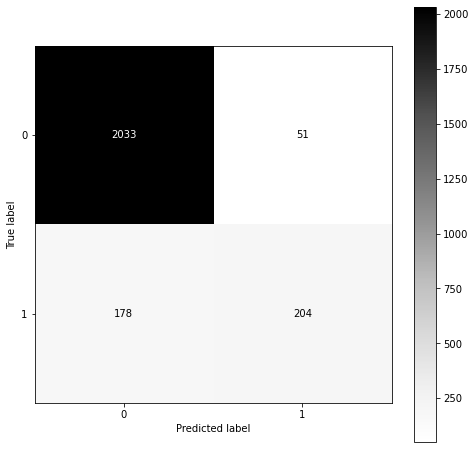

In [143]:
fig, ax = plt.subplots(figsize=(8, 8))

# plot the confusion matrix for the model
plot_confusion_matrix(RF, X_test, y_test, cmap=plt.cm.Greys, ax=ax)  
plt.show()

## 4.6. AdaBoost

### 4.6.1 Import and Train the AdaBoostClassifier 

In [144]:
# import AdaBoostClassifier from Scikit-learn package.
from sklearn.ensemble import AdaBoostClassifier

# Train the model
AdaB = AdaBoostClassifier().fit(X_train, y_train)

### 4.6.2 Prediction and Evaluation on Train Set - AdaBoostClassifier 

In [145]:
#Prediction on Train Set
y_pred_AdaB = AdaB.predict(X_train)

# get the report of model evaluation on Train Set
print(classification_report(y_train, y_pred_AdaB))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8338
           1       0.67      0.59      0.63      1526

    accuracy                           0.89      9864
   macro avg       0.80      0.77      0.78      9864
weighted avg       0.89      0.89      0.89      9864



### 4.6.3 Prediction and Evaluation on Test Set - AdaBoostClassifier 

In [146]:
#Prediction on Test Set
y_hat_AdaB = AdaB.predict(X_test)

# get the report of model evaluation on Test Set
print(classification_report(y_test, y_hat_AdaB))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.70      0.55      0.62       382

    accuracy                           0.89      2466
   macro avg       0.81      0.75      0.78      2466
weighted avg       0.89      0.89      0.89      2466



### 4.6.4 Confusion Matrix - AdaBoostClassifier 


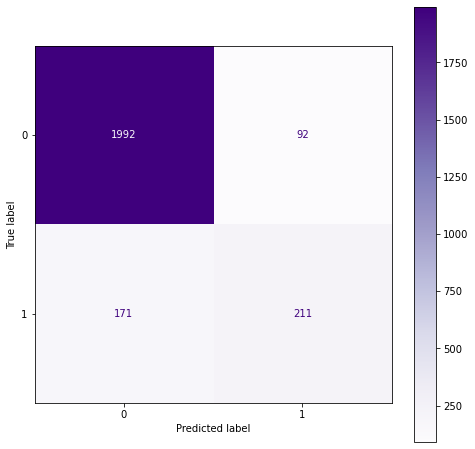

In [147]:
fig, ax = plt.subplots(figsize=(8, 8))

# plot the confusion matrix for the model
plot_confusion_matrix(AdaB, X_test, y_test, cmap=plt.cm.Purples, ax=ax)  
plt.show()

# 5. Summary

Before training the classification models, our dataset had to go through Exploratory Data Analysis (EDA), in partivular, data cleaning, preprocessing and standardization. To this end, we carefully analyzed the dataset and did the following: 

1. Encoded the categorical variables (columns) 
2. Normalized the numerical columns. 

We then split the dataset to train and test sets. Finally, we trained our prediction models with train set, and tested them on the testset to make the prediction. 

The classification models that were trained are

1. K Nearest  Neighbors 
2. Logistic Regression  
3. Support  Vector Machine 
4. Decision  Tree 
5. Random Forest 
6. AdaBoost 


The performance of the machine learning models we built for this data set can be summarized in the following table:

In [148]:
#collect all prediction 
predictions = [y_hat_KNN, y_hat_LR, y_hat_SVM, y_hat_DT, y_hat_AdaB , y_hat_RF ] 


#define empty list for each component of classification_report
Accuracy = []
Recall = [] 
Precision = [] 
F1_Score = []
AUC = []


# compute the accuracy measures for all models  
for pred in predictions:
    Accuracy.append(round(metrics.accuracy_score(y_test, pred),4))
    Recall.append(recall_score(y_test, pred))
    Precision.append(precision_score(y_test, pred))
    F1_Score.append( f1_score(y_test, pred))
    AUC.append(roc_auc_score(y_test, pred))


# collect the models name as a list
classifier = ["K Nearest  Neighbors",
              "Logistic Regression", 
              "Support  Vector Machine",
              "Decision  Tree",
              "AdaBoost",
              "Random Forest" 
              ] 

# create a dictionary with the accuries reslut 
accuracies  = {'Accuracy': Accuracy,
               'Recall': Recall,
               'Precision': Precision,
               'F1 Score': F1_Score,
               'AUC' : AUC}

# create a dataframe that give us the summary of the accuracies result for each model
df_conclusion = pd.DataFrame(accuracies, index = classifier ).sort_values(by = ["Accuracy"], ascending=[False])

df_conclusion

,Accuracy,Recall,Precision,F1 Score,AUC
Random Forest,0.9071,0.534031,0.800000,0.640502,0.754780
Support Vector Machine,0.8962,0.450262,0.788991,0.573333,0.714094
AdaBoost,0.8933,0.552356,0.696370,0.616058,0.754105
K Nearest Neighbors,0.8897,0.369110,0.819767,0.509025,0.677117
Logistic Regression,0.8852,0.356021,0.786127,0.490090,0.669133
Decision Tree,0.8702,0.539267,0.588571,0.562842,0.735085


# 6. Conclusion

We conclude that the Random Forest classifier is the best machine learning model to predict whether a customer will buy a product or not. The accuracy score of the Random Forest classifier is 90.71%, which means that it  predicts  90.71% of the cases correcly. Moreover, the Random Forest classifier have better scores than other models in almost all metrics. In the next part, we propose a few suggestions that help us to improve the Random Forest performance.


<b>Note:</b> Our analysis shows that the Support Vector Machine and AdaBoost classifiers have very good performance as well. The accuracy score of both models is between 89% and 90%. Our recommendation is to apply the following suggestions to improve the performance of these models as well. 



### 6.1 Suggestions to Improve the Prediction Models Performance:

After picking our best machine learning models, we would like to improve their performance on this dataset. More precisely, we would like to 

1. reduce the number of False Positives (FP) - people who we predicted would make an online purchase but they didn't. Recall that having a higher Precision Score yields the lower number of False Positives.


2. reduce  the number of False Negative (FN) - people who we predicted won't make an online purchase but they did. Recall that having a higher Recall Score yields the lower number of False Negatives.


3. improve the model performance (in particular, accuracy and AUC).


In order to addresse these concerns, one can apply the following:


<b>HyperParameter Tunning:</b>

One suggestion would be to do Hyperparameter tunning on our machine learning models to improve the model performance (in particular, Accuracy, Recall and Precision). In fact, one of the effiecient method to improve the model accuracy is do the tunning hyperparameters tunning. Moreover, we need to point out that this method can be applied to increases the Precision and Recall Scores.

    

<b>Cross validation:</b>

Cross-validation is used to avoid overfitting which cause better performance for the models. The most used cross-validation techniques are "k-fold" and "stratified k-fold cross-validations". However, we are dealing with an imbalanced data set, so the best candidate to apply Cross-validation is "Repeated Stratified K-Fold". This technique has a parameter "n_repeats" which is "Number of times cross-validator needs to be repeated", and is better when we are working on imbalanced dataset.  




<b>Notes:</b> 

1. Based on our analysis (confusion matrices) and the final report, all the models (except the Decision Tree model) have a much higher FN than FP. So, our priority in this dataset is to reduce the number of False Negative by improving the recall score.

2. We may use ROC curve to improve the model performance. Especially, it can be applied to increase the recall score which decrease FN value. 
 
3. Recall that we still had outliers, and that might have impacted the performance of the models.


### 6.2 Remark

When we apply the trian_test_split technique, choosing the test set size is always challenging, and is kind of open question. We have implimented the following code which gives us  the accuracy  of each model for different size of testset.   

In [149]:
# set different testset sizes
sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.33]

# define empty lists corresponding to each model
L = []
T = []
K = []
S = []
R = []
A = []

# for each size perfom train_test_split and evaluate the accuracies 
for size in sizes:
    X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=size, stratify=y)
    
    LR = LogisticRegression().fit(X_trainset, y_trainset)
    L.append(round(metrics.accuracy_score(y_testset, LR.predict(X_testset)),4))
    
    Tree = DecisionTreeClassifier().fit(X_trainset, y_trainset)
    T.append(round(metrics.accuracy_score(y_testset, Tree.predict(X_testset)),4))
    
    KNN = KNeighborsClassifier().fit(X_trainset, y_trainset)
    K.append(round(metrics.accuracy_score(y_testset, KNN.predict(X_testset)),4))
    
    SVM = svm.SVC().fit(X_trainset, y_trainset)
    S.append(round(metrics.accuracy_score(y_testset, SVM.predict(X_testset)),4))
    
    RF = RandomForestClassifier().fit(X_trainset, y_trainset)
    R.append(round(metrics.accuracy_score(y_testset, RF.predict(X_testset)),4))
    
    AdaB = AdaBoostClassifier().fit(X_trainset, y_trainset)
    A.append(round(metrics.accuracy_score(y_testset,  AdaB.predict(X_testset)),4))
    

# create a dictionary with the name of models and their corresponding results
classifier_performance = {"K Nearest  Neighbors": K,
                          "Logistic Regression":L, 
                          "Support  Vector Machine":S,
                          "Decision  Tree":T,
                          "AdaBoost":A,
                          "Random Forest":R 
                          } 


#create a dataFrame that shows the final result
performance = pd.DataFrame(classifier_performance, index = sizes ) #.sort_values(by = ["Accuracy"], ascending=False )


# assign  title for testset sizes
index = performance.index
index.name = "Test Size"


performance

,K Nearest Neighbors,Logistic Regression,Support Vector Machine,Decision Tree,AdaBoost,Random Forest
Test Size,,,,,,
0.10,0.8719,0.8873,0.8905,0.8597,0.8921,0.9051
0.15,0.8708,0.8735,0.8854,0.8449,0.8811,0.8978
0.20,0.8751,0.8840,0.8905,0.8621,0.8909,0.9015
0.25,0.8767,0.8836,0.8943,0.8599,0.8923,0.9056
0.30,0.8789,0.8821,0.8908,0.8597,0.8894,0.9081
0.33,0.8779,0.8833,0.8958,0.8552,0.8970,0.9096


We may look at this result in order to find the best testset size for each machine learning classifier. This could improve the performance of each machine learning model on the dataset. 